In [1]:
import pandas as pd
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
import time

In [2]:
train_data_path = r"E:\AbioticNeuron\DS\Pytorch\fmnist_problem\dataset\fashion-mnist_train.csv"
test_data_path = r"E:\AbioticNeuron\DS\Pytorch\fmnist_problem\dataset\fashion-mnist_test.csv"
x_dtype = torch.float32
y_dtype = torch.long
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')# torch.device('cpu') 
print(device)
learning_rate = 0.1
epochs = 100

cuda


## Data Preparation

In [3]:
train_data = pd.read_csv(train_data_path)
test_data = pd.read_csv(test_data_path)

In [4]:
train_data.head(5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train_data.shape, test_data.shape

((60000, 785), (10000, 785))

In [6]:
train_data_x = train_data.iloc[:, 1:]/255.0
train_data_y = train_data.iloc[:,0]

test_data_x = test_data.iloc[:, 1:]/255.0
test_data_y = test_data.iloc[:,0]

In [7]:
test_data_y.nunique()

10

### Data Visualization

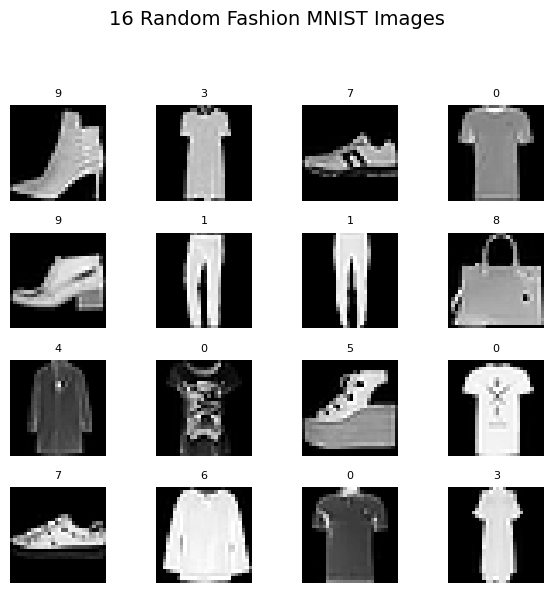

In [8]:
# Sample 16 random rows
sample = train_data.sample(n=16).reset_index(drop=True)

# Plot 4x4 grid
fig, axes = plt.subplots(4, 4, figsize=(6, 6))
fig.suptitle("16 Random Fashion MNIST Images", fontsize=14)

for i, ax in enumerate(axes.flat):
    img = sample.iloc[i, 1:].values.reshape(28, 28)  # pixels
    label = sample.iloc[i, 0]  # label
    ax.imshow(img, cmap='gray')
    ax.set_title(str(label), fontsize=8)
    ax.axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()

## Dataset Object creation

In [9]:
class FMNISTDataset(Dataset):
    def __init__(self, input_x, input_y, device):
        super().__init__()
        # Convert to tensors and move to device once
        self.x = torch.tensor(input_x.values, dtype=x_dtype, device=device)
        self.y = torch.tensor(input_y.values, dtype=y_dtype, device=device)

    def __len__(self):
        return self.y.shape[0]

    def __getitem__(self, index):
        return self.x[index], self.y[index]

In [10]:
train_dataset = FMNISTDataset(train_data_x, train_data_y, device)
test_dataset = FMNISTDataset(test_data_x, test_data_y, device)

train_data_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_data_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=True)

In [11]:
train_dataset.__getitem__(0)[1]

tensor(2, device='cuda:0')

## Defining Model Architecture

In [12]:
class NNModel(torch.nn.Module):
    def __init__(self, num_features, l_r):
        super().__init__()
        self.neural_network = nn.Sequential(
            nn.Linear(num_features, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 10)
        )
        self.loss_function = nn.CrossEntropyLoss()
        self.optimizer = torch.optim.SGD(params=self.neural_network.parameters(), lr=l_r)
        self.loss = None

    def forward(self, x):
        return self.neural_network(x)

    # change method
    def backward(self, loss):
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()



## Model Training

In [13]:
model = NNModel(num_features=784, l_r=learning_rate)
model = model.to(device=device) # moving to gpu

### starting training

In [14]:
epoch_losses = []

start_time = time.time()
for epoch in range(epochs):
    epoch_loss = 0.0
    batch_count = 0
    
    for batch_idx, (features, label) in enumerate(train_data_loader):
        
        prediction = model(features)
        loss = model.loss_function(prediction, label)
        model.backward(loss=loss)
 
        epoch_loss += loss.item()
        batch_count += 1

    avg_loss = epoch_loss / batch_count
    epoch_losses.append(avg_loss)
    print(f"Epoch-{epoch} Average Loss: {avg_loss:.4f}")

stop_time = time.time()
print(f"Total Training Time: {stop_time - start_time:.2f} seconds")


Epoch-0 Average Loss: 0.6987
Epoch-1 Average Loss: 0.4487
Epoch-2 Average Loss: 0.3967
Epoch-3 Average Loss: 0.3660
Epoch-4 Average Loss: 0.3470
Epoch-5 Average Loss: 0.3283
Epoch-6 Average Loss: 0.3139
Epoch-7 Average Loss: 0.3037
Epoch-8 Average Loss: 0.2936
Epoch-9 Average Loss: 0.2842
Epoch-10 Average Loss: 0.2755
Epoch-11 Average Loss: 0.2683
Epoch-12 Average Loss: 0.2639
Epoch-13 Average Loss: 0.2541
Epoch-14 Average Loss: 0.2499
Epoch-15 Average Loss: 0.2436
Epoch-16 Average Loss: 0.2364
Epoch-17 Average Loss: 0.2325
Epoch-18 Average Loss: 0.2263
Epoch-19 Average Loss: 0.2227
Epoch-20 Average Loss: 0.2188
Epoch-21 Average Loss: 0.2137
Epoch-22 Average Loss: 0.2079
Epoch-23 Average Loss: 0.2031
Epoch-24 Average Loss: 0.2011
Epoch-25 Average Loss: 0.1967
Epoch-26 Average Loss: 0.1938
Epoch-27 Average Loss: 0.1905
Epoch-28 Average Loss: 0.1863
Epoch-29 Average Loss: 0.1846
Epoch-30 Average Loss: 0.1803
Epoch-31 Average Loss: 0.1768
Epoch-32 Average Loss: 0.1722
Epoch-33 Average Los

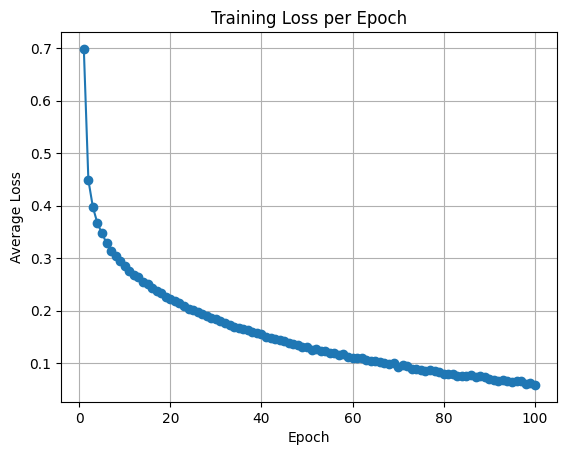

In [15]:
import matplotlib.pyplot as plt

plt.plot(range(1, epochs+1), epoch_losses, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Average Loss')
plt.title('Training Loss per Epoch')
plt.grid(True)
plt.show()

In [16]:
gpu_trainning = 186.41
cpu_training = 466.90
print(cpu_training/gpu_trainning)

2.5046939541870072


## Model Evaluation

In [29]:
model.eval()

train_total = 0
train_correct = 0
test_total = 0
test_correct = 0

with torch.no_grad():
    # Train data accuracy
    for x, y in train_data_loader:
        y_pred = model(x)                          # (batch_size, num_classes)
        predicted = torch.argmax(y_pred, dim=1)    # (batch_size,)
        train_total += y.size(0)
        train_correct += (predicted == y).sum().item()

    # Test data accuracy
    for x, y in test_data_loader:
        y_pred = model(x)
        predicted = torch.argmax(y_pred, dim=1)
        test_total += y.size(0)
        test_correct += (predicted == y).sum().item()

# Results (formatted)
print("=" * 50)
print(f"{'Dataset':<12} {'Size':>8} {'Accuracy':>12}")
print("-" * 50)
print(f"{'Train':<12} {train_total:>8} {train_correct / train_total:>11.4%}")
print(f"{'Test':<12} {test_total:>8} {test_correct / test_total:>11.4%}")
print("=" * 50)


Dataset          Size     Accuracy
--------------------------------------------------
Train           60000    98.5433%
Test            10000    89.6600%


## Saving the Model

In [30]:
# Save
torch.save(model.state_dict(), "model1.pth")